In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd
from pathlib import Path

#### Load neuronal ARI Data

In [2]:
path1 = '../data/ari_neuronal/'
df = pd.read_pickle(Path(path1, 'results_table_neuron.pkl'))

In [3]:
# Reformat.
df_neuronal = pd.DataFrame(columns=['n_clusters', 'ari'])

for i, row in df.iterrows():
    aris = row.ari
    n = len(aris)
    item = {
        'n_clusters': [row.n_clusters] * n,
        'ari': aris,
    }
    df_neuronal = pd.concat([df_neuronal, pd.DataFrame(item)])
df_neuronal = df_neuronal.reset_index()

In [4]:
df_neuronal['var'] = 'None'

#### Load synthetic ARI data

In [5]:
path2 = '../data/ari_synthetic/'

In [6]:
n_c = 20
df = pd.read_pickle(Path(path2, f'results_table_synthetic_ng{n_c}.pkl'))

In [7]:
df['n_clusters_generate'] = df['n_clusters_generate'].astype('int')
df['n_clusters_analyze'] = df['n_clusters_analyze'].astype('int')

In [8]:
# Reformat.
df_synthetic = pd.DataFrame(
    columns=['n_clusters_generate', 'n_clusters_analyze', 'var', 'ari']
)

for i, row in df.iterrows():
    aris = row.ari
    n = len(aris)
    item = {
        'n_clusters_generate': [row.n_clusters_generate] * n,
        'n_clusters_analyze': [row.n_clusters_analyze] * n,
        'var': [row['var']] * n,
        'ari': aris,
    }
    df_synthetic = pd.concat([df_synthetic, pd.DataFrame(item)])

### Plot

In [9]:
n_clusters_analyze = [7, 10, 15, 20, 40, 60, 80]

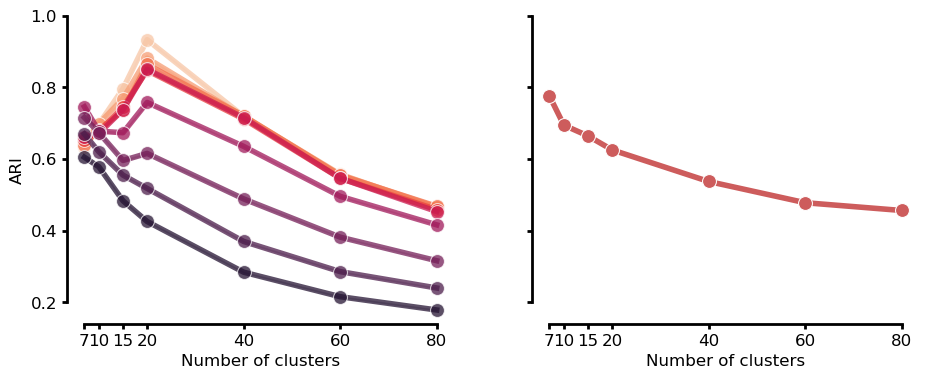

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)

# Plot ARI curves of synthetic data.
sns.lineplot(
    data=df_synthetic,
    x='n_clusters_analyze',
    y='ari',
    hue='var',
    style='var',
    legend=False,
    markers=['o'] * 9,
    dashes=False,
    palette=sns.color_palette('rocket_r', n_colors=9),
    ax=ax[0],
    linewidth=4,
    markersize=10,
    clip_on=False,
    alpha=0.75,
)

# Plot ARI curve of neuronal data.
sns.lineplot(
    data=df_neuronal,
    x='n_clusters',
    y='ari',
    color='indianred',
    style='var',
    legend=False,
    markers=["o"],
    dashes=False,
    linewidth=4,
    markersize=10,
    clip_on=False,
    ax=ax[1],
)


# Set plotting parameters.
for i in range(2):
    ax[i].set_xticks(n_clusters_analyze, labels=n_clusters_analyze, fontsize=12)
    ax[i].set_yticks(
        [0.2, 0.4, 0.6, 0.8, 1.0], labels=[0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12
    )
    ax[i].set_xlabel('Number of clusters', fontsize=12)
    ax[i].set_ylabel('ARI', fontsize=12)
    ax[i].tick_params('y', labelbottom=True, width=2, labelsize=12)
    ax[i].tick_params('x', labelbottom=True, width=2, labelsize=12)

    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i].spines[axis].set_linewidth(2)

sns.despine(trim=1)
# fig.savefig(f'figures/ari_combined.pdf', bbox_inches='tight', transparent=True)